<a href="https://colab.research.google.com/github/clappy203/AAI521_Computer_vision_Group-4/blob/Petra/AAI_521_Final_project_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi -L

GPU 0: NVIDIA A100-SXM4-80GB (UUID: GPU-eb308c1a-f099-b682-a740-5f51b384ca73)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
files.upload()


Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"clapetraomaku","key":"ab4d800dfd12fd66f776bd46ae3af34f"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d dansbecker/food-101 -p /content/drive/MyDrive/Aritificial_Intelligence/USD/CV/food101

Dataset URL: https://www.kaggle.com/datasets/dansbecker/food-101
License(s): other
100% 9.36G/9.38G [00:45<00:00, 448MB/s]
100% 9.38G/9.38G [00:46<00:00, 216MB/s]


In [ ]:
!unzip /content/drive/MyDrive/Aritificial_Intelligence/USD/CV/food101/food-101.zip -d /content/drive/MyDrive/Aritificial_Intelligence/USD/CV/food101

Dataset Structure & Summary

In [ ]:
import os
from collections import Counter
root = "/content/drive/MyDrive/Aritificial_Intelligence/USD/CV/food101/food-101/__MACOSX/food-101/images"
IMG_EXTS = (".jpg", ".jpeg", ".png")

# 1. Gather image paths and labels
image_list = []
label_list = []


# Get class folders
classes = sorted([d for d in os.listdir(root) if os.path.isdir(os.path.join(root, d))])

# Dictionary to store image count per class
class_counts = {}

for cls in classes:
    cls_dir = os.path.join(root, cls)
    count = 0

    for fname in os.listdir(cls_dir):
        if fname.lower().endswith(IMG_EXTS):
            image_list.append(os.path.join(cls_dir, fname))
            label_list.append(cls)
            count += 1

    class_counts[cls] = count

# 2. Overall summary
print("===== FOOD-101 DATASET SUMMARY =====\n")
print(f"Total images found: {len(image_list)}")
print(f"Total unique labels: {len(set(label_list))}")

# 3. Per-class statistics
print("\n===== IMAGES PER CLASS =====\n")
for cls, cnt in class_counts.items():
    print(f"{cls}: {cnt}")

# 4. Additional EDA checks
counts = list(class_counts.values())

print("\n===== EDA INSIGHTS =====\n")
print(f"Smallest class size: {min(counts)}")
print(f"Largest class size : {max(counts)}")
print(f"Average class size : {sum(counts) / len(counts):.2f}")

if len(set(counts)) == 1:
    print("\nDataset is UNIFORM: All classes have exactly the same number of images.")
else:
    print("\nDataset is NOT uniform: Class sizes vary.")
    missing = [cls for cls, cnt in class_counts.items() if cnt != max(counts)]
    print(f"Classes with fewer images than the largest: {missing}")

===== FOOD-101 DATASET SUMMARY =====

Total images found: 32095
Total unique labels: 33

===== IMAGES PER CLASS =====

apple_pie: 1000
baby_back_ribs: 1000
baklava: 1000
beef_carpaccio: 1000
beef_tartare: 1000
beet_salad: 1000
beignets: 1000
bibimbap: 1000
bread_pudding: 1000
breakfast_burrito: 1000
bruschetta: 1000
caesar_salad: 1000
cannoli: 1000
caprese_salad: 1000
carrot_cake: 1000
ceviche: 1000
cheese_plate: 1000
cheesecake: 1000
chicken_curry: 1000
chicken_quesadilla: 1000
chicken_wings: 1000
chocolate_cake: 1000
chocolate_mousse: 1000
churros: 1000
clam_chowder: 1000
club_sandwich: 1000
crab_cakes: 1000
creme_brulee: 1000
croque_madame: 1000
cup_cakes: 1000
deviled_eggs: 1000
donuts: 1000
dumplings: 95

===== EDA INSIGHTS =====

Smallest class size: 95
Largest class size : 1000
Average class size : 972.58

Dataset is NOT uniform: Class sizes vary.
Classes with fewer images than the largest: ['dumplings']


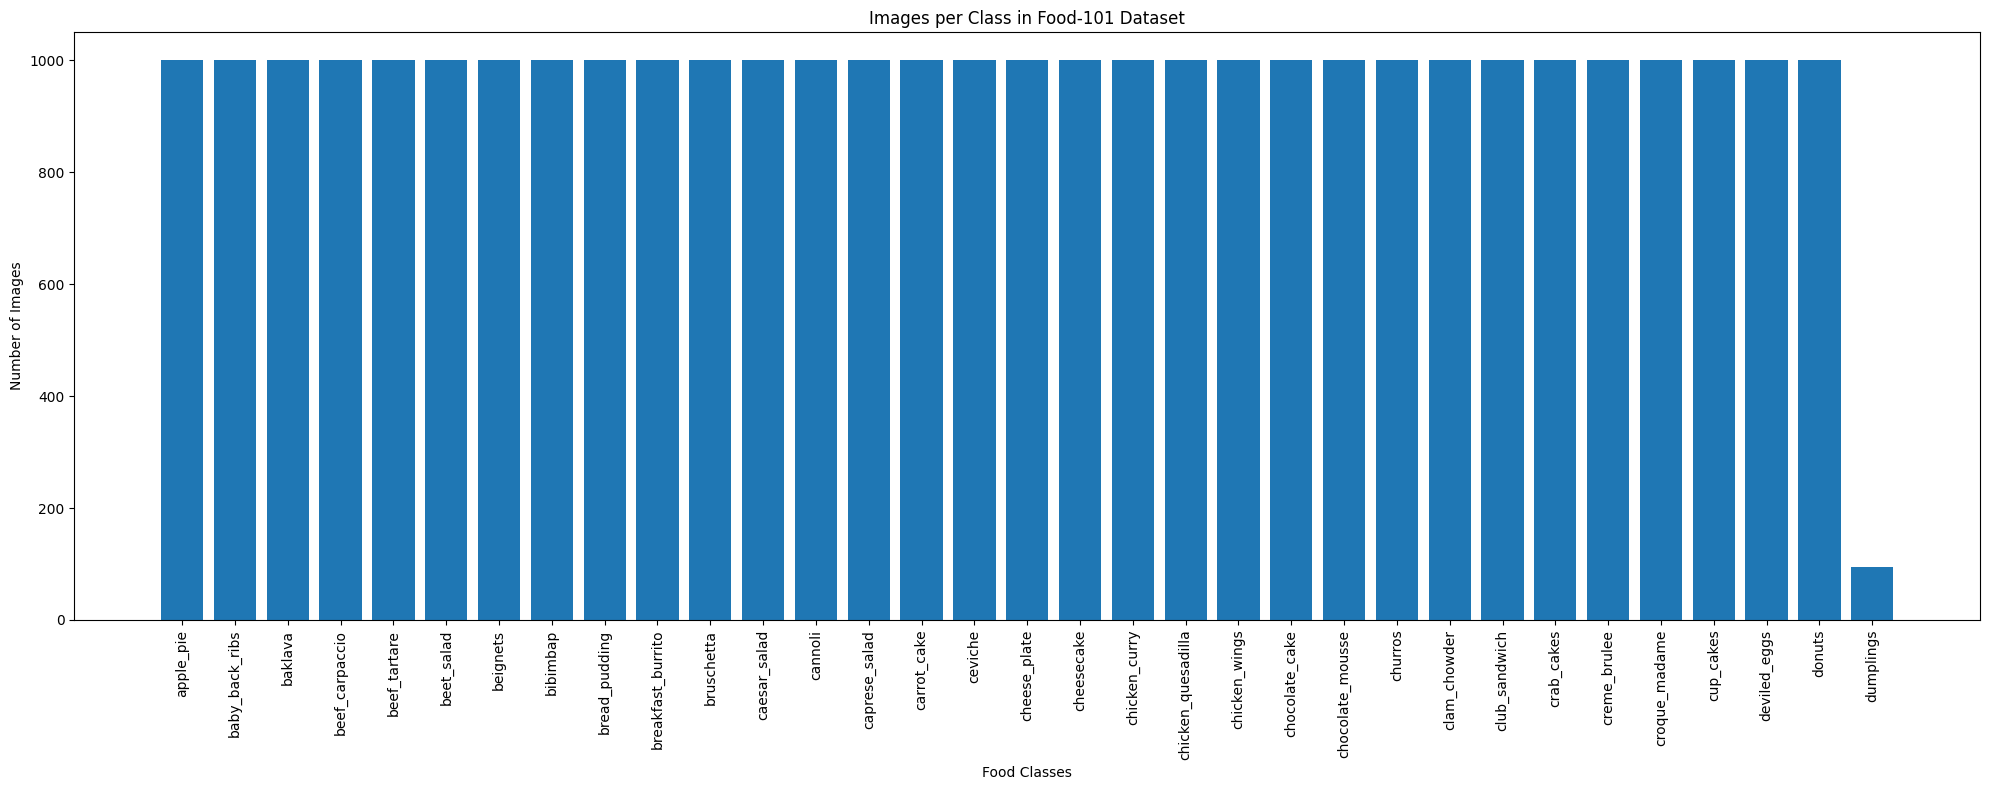

In [ ]:
# ===== BAR CHART VISUALIZATION =====
import matplotlib.pyplot as plt

# Sort classes alphabetically for cleaner plotting
sorted_classes = list(class_counts.keys())
sorted_counts = [class_counts[c] for c in sorted_classes]

plt.figure(figsize=(20, 8))
plt.bar(sorted_classes, sorted_counts)
plt.xticks(rotation=90)
plt.xlabel("Food Classes")
plt.ylabel("Number of Images")
plt.title("Images per Class in Food-101 Dataset")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# 2. Train/Test split - Corrected to use image_list for features and label_list for labels
train_images, test_images, train_labels_str, test_labels_str = train_test_split(
    image_list, label_list, test_size=0.2, random_state=42, shuffle=True
)

# Create a mapping from class names (strings) to integer indices
class_to_idx = {name: i for i, name in enumerate(classes)}

# Convert string labels to integer indices
train_labels = [class_to_idx[label] for label in train_labels_str]
test_labels = [class_to_idx[label] for label in test_labels_str]

print(f"Train: {len(train_images)} | Test: {len(test_images)}")
# print("Saved: train.txt, test.txt")


Train: 25676 | Test: 6419
